# Continue from Assignment 2, use credit card features to model

## Section 1: Wrap-up features from assignment 2

### Section 1.1 Data Preparation and change columns

In [321]:
import pandas as pd
df = pd.read_csv('purchase_credit_card.csv') #, encoding = "ISO-8859-1")
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,07/29/2013 12:00:00 AM,07/31/2013 12:00:00 AM,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,07/30/2013 12:00:00 AM,07/31/2013 12:00:00 AM,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


In [322]:
# change column names 
df.columns = ['Year_Month', 'Agency_Number', 'Agency_Name', 'Cardholder_Last_Name',
      'Cardholder_First_Initial', 'Description', 'Amount', 'Vendor', 'Transaction_Date',
      'Posted_Date', 'Merchant_Category']

### 1.2 Create data fields

In [323]:
#Creating separate Year and Month columns for future feature engineering
# Converting Transaction_Date and Posted_date from Python Object data type to datetime
df['Transaction_Date']=pd.to_datetime(df['Transaction_Date'])
df['Posted_Date']=pd.to_datetime(df['Posted_Date'])

df['Year_Month'].dtype
df['Year_Month']=pd.to_datetime(df['Year_Month'], format='%Y%m')
df['Year'] = df['Year_Month'].dt.year
df['Month'] = df['Year_Month'].dt.month
#Creating 'Week_Number' from 'Transaction_Date'
df['Week_Number'] = df['Transaction_Date'].dt.isocalendar().week

#Creating 'Day_of_Week' from 'Transaction_Date'
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['Day_of_Week'] = df['Transaction_Date'].dt.dayofweek.map(dayOfWeek)

df['Day_of_Week'].value_counts()

Wednesday    89644
Thursday     87537
Tuesday      86919
Friday       79917
Monday       61809
Saturday     26307
Sunday       10325
Name: Day_of_Week, dtype: int64

## Section 1.3 Feature Engineering

### 3.1 Feature 1: The ratio to average amount

In [324]:
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].mean()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['AVG_amount']
#stat_by_agency

In [325]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df1['agency_merchant_avg_ratio_amount'] = np.where(df1['AVG_amount']==0,0, df1['Amount'] / df1['AVG_amount'])
#df1['agency_merchant_avg_ratio_amount'].describe()

[Text(0, 0, '(-2735.681, -0.681]'),
 Text(1, 0, '(-0.681, 0.0212]'),
 Text(2, 0, '(0.0212, 0.133]'),
 Text(3, 0, '(0.133, 0.515]'),
 Text(4, 0, '(0.515, 1.298]'),
 Text(5, 0, '(1.298, 3.515]'),
 Text(6, 0, '(3.515, 8.71]'),
 Text(7, 0, '(8.71, 2735.68]')]

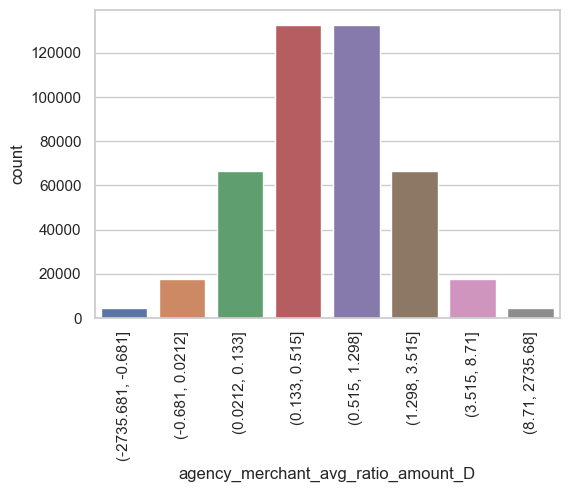

In [326]:
# cut by percentile for plotting
var = 'agency_merchant_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df1[binned_var] = pd.qcut(df1[var], percentile)
df1[['agency_merchant_avg_ratio_amount_D']]
# check percentile distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_avg_ratio_amount_D", data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### 3.2 Feature 2: The ratio to the median amount

In [327]:
# create median spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['Median_amount']

In [328]:
# add the new feature median spending to the dataset 
df2 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df2['agency_merchant_median_ratio_amount'] = np.where(df2['Median_amount']==0,0, df2['Amount'] / df2['Median_amount'])
#df2['agency_merchant_median_ratio_amount'].describe()

[Text(0, 0, '(-1003.177, -1.121]'),
 Text(1, 0, '(-1.121, 0.0653]'),
 Text(2, 0, '(0.0653, 0.362]'),
 Text(3, 0, '(0.362, 1.0]'),
 Text(4, 0, '(1.0, 2.691]'),
 Text(5, 0, '(2.691, 9.283]'),
 Text(6, 0, '(9.283, 28.085]'),
 Text(7, 0, '(28.085, 528116.053]')]

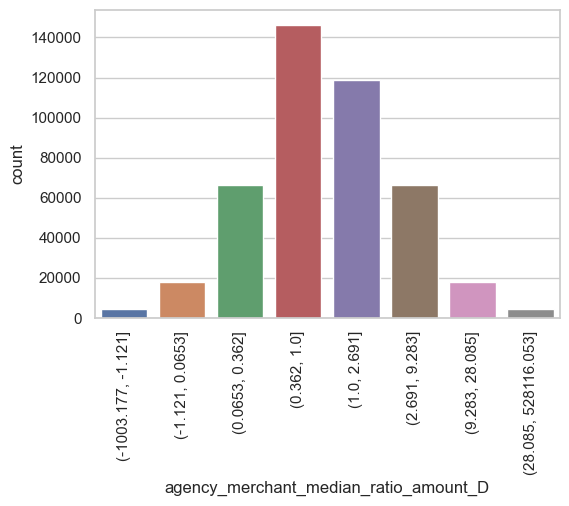

In [329]:
# cut by percentile for plotting
var = 'agency_merchant_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut(df2[var],percentile)

plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_median_ratio_amount_D", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Now we have identified extreme spending compared to the same merchant category.
#df2[df2['agency_merchant_median_ratio_amount']>2].head()

### 3.3 Feature 3: The ratio to average monthly amount

1. From previous first feature we chose, we formulate structures based on agency and merchant category
2. Furthermore, we can dive deeper in the same structure but more detailed in time dimension by looking into variable month

In [330]:
# extract month from datetime 'Year_Month' and assign to new column
df['Month'] = df['Year_Month'].dt.month
# create average monthly spending group by agency, merchant category and month
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Month'])['Amount'].mean()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['monthly_AVG_amount']
#stat_by_agency

In [331]:
# add the new feature average spending to the dataset 
df3 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Month'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df3['agency_merchant_monthly_avg_ratio_amount'] = np.where(df3['monthly_AVG_amount']==0,0, df3['Amount'] / df3['monthly_AVG_amount'])
#df3['agency_merchant_monthly_avg_ratio_amount'].describe()

[Text(0, 0, '(-2.4477063974758644e+16, -0.734]'),
 Text(1, 0, '(-0.734, 0.0239]'),
 Text(2, 0, '(0.0239, 0.151]'),
 Text(3, 0, '(0.151, 0.598]'),
 Text(4, 0, '(0.598, 1.34]'),
 Text(5, 0, '(1.34, 3.417]'),
 Text(6, 0, '(3.417, 8.05]'),
 Text(7, 0, '(8.05, 3.0596329968448308e+16]')]

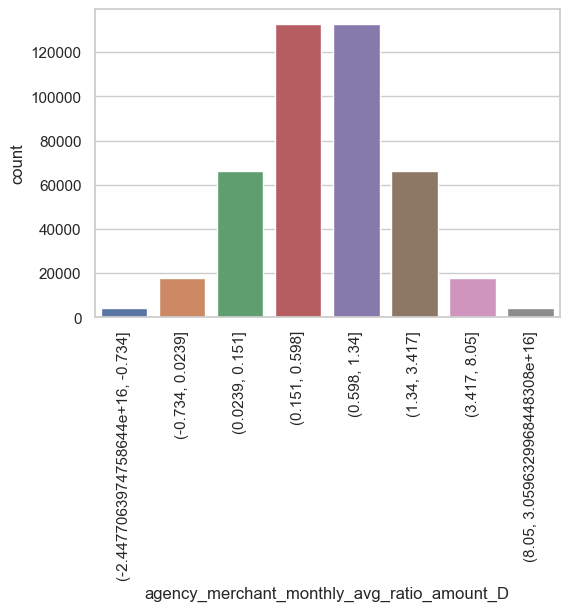

In [332]:
# cut by percentile for plotting
var = 'agency_merchant_monthly_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df3[binned_var] = pd.qcut(df3[var],percentile)
df3[['agency_merchant_monthly_avg_ratio_amount_D']]

#sns.countplot(x="agency_merchant_monthly_avg_ratio_amount_D", data=df3)
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_monthly_avg_ratio_amount_D", data=df3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

#df3[df3['agency_merchant_monthly_avg_ratio_amount']>2].head()

### 3.4 Feature 4: The ratio to the monthly median amount

1. From previous second feature we chose, we formulated structures based on agency and merchant category
2. Furthermore, we can dive deeper in the same structure but more detailed in time dimension by looking into variable month

In [333]:
# create median spending group by agency, merchant and month category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Month'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['monthly_Median_amount']

In [334]:
# add the new feature average spending to the dataset 
df4 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Month'])
# Feature 4: ratio of amount spending and avergae spending by merchant category 
df4['agency_merchant_monthly_median_ratio_amount'] = np.where(df4['monthly_Median_amount']==0,0, df4['Amount'] / df4['monthly_Median_amount'])
#df4['agency_merchant_monthly_median_ratio_amount'].describe()

[Text(0, 0, '(-29642.001, -1.103]'),
 Text(1, 0, '(-1.103, 0.0687]'),
 Text(2, 0, '(0.0687, 0.389]'),
 Text(3, 0, '(0.389, 1.0]'),
 Text(4, 0, '(1.0, 2.425]'),
 Text(5, 0, '(2.425, 8.71]'),
 Text(6, 0, '(8.71, 27.182]'),
 Text(7, 0, '(27.182, 598420.506]')]

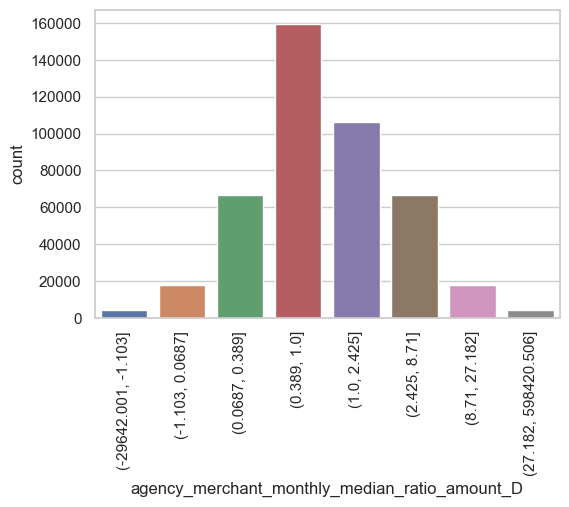

In [335]:
# cut by percentile for plotting
var = 'agency_merchant_monthly_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df4[binned_var] = pd.qcut(df4[var],percentile)

#sns.countplot(x="agency_merchant_monthly_median_ratio_amount_D", data=df3)
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_monthly_median_ratio_amount_D", data=df4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#df4[df4['agency_merchant_monthly_median_ratio_amount']>2].head()

### 3.5 Feature 5: The ratio to the yearly mean amount

1. From previous features we chose, we formulated structures based on agency, merchant and month category
2. Furthermore, we can dive deeper in the same structure but more detailed in year dimension by looking into variable year 

In [336]:
# extract year from datetime 'Year_Month' and assign to new column
df['Year'] = df['Year_Month'].dt.year

# create average yearly spending group by agency, merchant category and year
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Year'])['Amount'].mean()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['yearly_AVG_amount']
#stat_by_agency

In [337]:
# add the new feature average spending to the dataset 
df5 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Year'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df5['agency_merchant_yearly_avg_ratio_amount'] = np.where(df5['yearly_AVG_amount']==0,0, df5['Amount'] / df5['yearly_AVG_amount'])
#df5['agency_merchant_yearly_avg_ratio_amount'].describe()

[Text(0, 0, '(-1.733491791570246e+17, -0.68]'),
 Text(1, 0, '(-0.68, 0.0216]'),
 Text(2, 0, '(0.0216, 0.137]'),
 Text(3, 0, '(0.137, 0.53]'),
 Text(4, 0, '(0.53, 1.311]'),
 Text(5, 0, '(1.311, 3.495]'),
 Text(6, 0, '(3.495, 8.569]'),
 Text(7, 0, '(8.569, 1.733491791570246e+17]')]

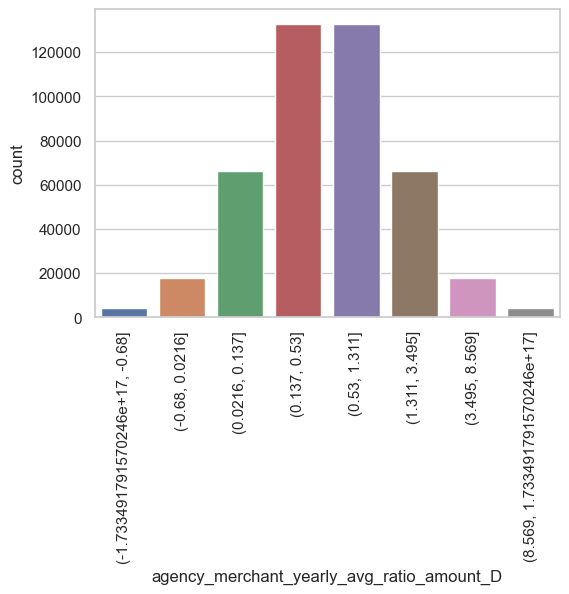

In [338]:
# cut by percentile for plotting
var = 'agency_merchant_yearly_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df5[binned_var] = pd.qcut(df5[var],percentile)
#sns.countplot(x="agency_merchant_yearly_avg_ratio_amount_D", data=df3)
#import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_yearly_avg_ratio_amount_D", data=df5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#df5[df5['agency_merchant_yearly_avg_ratio_amount']>2].head()

### 3.6 Feature 6: The ratio to the yearly median amount

1. From previous features we chose, we formulated structures based on agency,merchant, and year category
2. Furthermore, we can dive deeper in the same structure but more detailed in yearly-time dimension by looking into variable year

In [339]:
# create median spending group by agency, merchant and month category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Year'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['yearly_Median_amount']

In [340]:
# add the new feature average spending to the dataset 
df6 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Year'])
# Feature 6: ratio of amount spending and median spending by merchant category on years
df6['agency_merchant_yearly_median_ratio_amount'] = np.where(df6['yearly_Median_amount']==0,0, df6['Amount'] / df6['yearly_Median_amount'])
#df6['agency_merchant_yearly_median_ratio_amount'].describe()

[Text(0, 0, '(-102375.001, -1.116]'),
 Text(1, 0, '(-1.116, 0.0655]'),
 Text(2, 0, '(0.0655, 0.366]'),
 Text(3, 0, '(0.366, 1.0]'),
 Text(4, 0, '(1.0, 2.649]'),
 Text(5, 0, '(2.649, 9.214]'),
 Text(6, 0, '(9.214, 27.893]'),
 Text(7, 0, '(27.893, 533293.661]')]

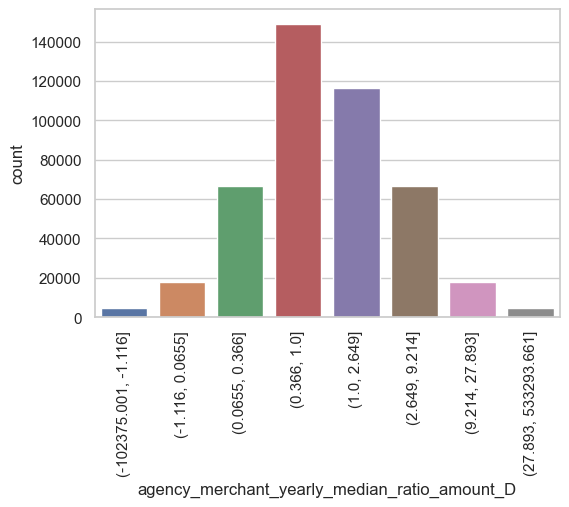

In [341]:
# cut by percentile for plotting
var = 'agency_merchant_yearly_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df6[binned_var] = pd.qcut(df6[var],percentile)
#df6[['agency_merchant_yearly_median_ratio_amount_D']]
#sns.countplot(x="agency_merchant_yearly_median_ratio_amount_D", data=df6)
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_yearly_median_ratio_amount_D", data=df6)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#df6[df6['agency_merchant_yearly_median_ratio_amount']>2].head()

### 3.7 Feature 7: Average amount spent in Day of week

1. This feature can tell us the expense pattern on days in daily basis
2. For example, weekends usually spend more and weekdays usually spend less

In [342]:
#df['Day_of_Week'].value_counts()
# create average spending group by agency and merchant category 
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Day_of_Week'])['Amount'].mean()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['dow_AVG_amount']
#stat_by_agency

In [343]:
# add the new feature average spending to the dataset 
df7 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Day_of_Week'])
# Feature 1: ratio of amount spending and avergae spending by merchant category 
df7['agency_merchant_dow_avg_ratio_amount'] = np.where(df7['dow_AVG_amount']==0,0, df7['Amount'] / df7['dow_AVG_amount'])
#df7['agency_merchant_dow_avg_ratio_amount'].describe()

[Text(0, 0, '(-5.875564958853576e+17, -0.746]'),
 Text(1, 0, '(-0.746, 0.0233]'),
 Text(2, 0, '(0.0233, 0.146]'),
 Text(3, 0, '(0.146, 0.573]'),
 Text(4, 0, '(0.573, 1.317]'),
 Text(5, 0, '(1.317, 3.454]'),
 Text(6, 0, '(3.454, 8.378]'),
 Text(7, 0, '(8.378, 5.875564958853576e+17]')]

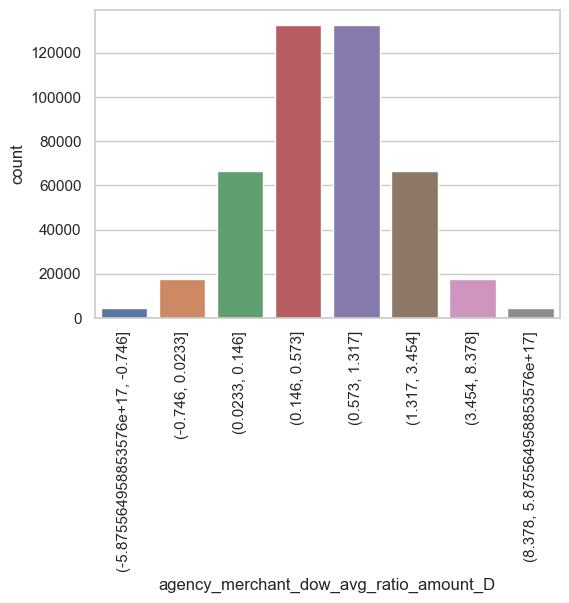

In [344]:
# cut by percentile for plotting
var = 'agency_merchant_dow_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df7[binned_var] = pd.qcut(df7[var],percentile)
#df7[['agency_merchant_dow_avg_ratio_amount_D']]
#import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_dow_avg_ratio_amount_D", data=df7)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#df7[df7['agency_merchant_dow_avg_ratio_amount']>2].head()

### 3.8 Feature 8: total amount spent in Day of week

This feature can tell us the expense pattern on days in weekly basis

In [345]:
# create total spending group by agency and merchant category in wod basis
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Day_of_Week'])['Amount'].sum()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['dow_sum_amount']
#stat_by_agency

In [346]:
# add the new feature total spending to the dataset 
df8 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Day_of_Week'])
# Feature 1: ratio of amount spending and total spending by merchant category and dow
df8['agency_merchant_dow_sum_ratio_amount'] = np.where(df8['dow_sum_amount']==0,0, df8['Amount'] / df8['dow_sum_amount'])
#df8['agency_merchant_dow_sum_ratio_amount'].describe()

[Text(0, 0, '(-1.013028441181651e+16, -0.0102]'),
 Text(1, 0, '(-0.0102, 6.48e-05]'),
 Text(2, 0, '(6.48e-05, 0.000511]'),
 Text(3, 0, '(0.000511, 0.00328]'),
 Text(4, 0, '(0.00328, 0.0393]'),
 Text(5, 0, '(0.0393, 0.392]'),
 Text(6, 0, '(0.392, 1.0]'),
 Text(7, 0, '(1.0, 1.013028441181651e+16]')]

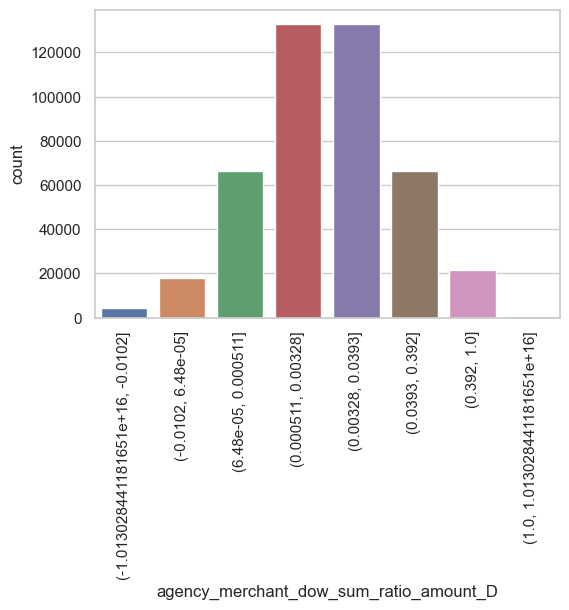

In [347]:
# cut by percentile for plotting
var = 'agency_merchant_dow_sum_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df8[binned_var] = pd.qcut(df8[var],percentile)
#df8[['agency_merchant_dow_sum_ratio_amount_D']]

plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_dow_sum_ratio_amount_D", data=df8)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#df8[df8['agency_merchant_dow_sum_ratio_amount']>2].head()

### 3.9 Feature 9: The ratio to the average amount by vendors

1. This feature can tell us the average expense on agency name, merchant category by each vedor

In [348]:
# create average spending group by agency, merchant category and vendor
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Vendor'])['Amount'].mean()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['vendor_avg_amount']
#stat_by_agency

In [349]:
# add the new feature average spending to the dataset 
df9 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Vendor'])
# Feature 9: ratio of amount spending and avergae spending by vendor
df9['agency_merchant_vendor_avg_ratio_amount'] = np.where(df9['vendor_avg_amount']==0,0, df9['Amount'] / df9['vendor_avg_amount'])
#df9['agency_merchant_vendor_avg_ratio_amount'].describe()

[Text(0, 0, '(-6.944550625405305e+16, -0.507]'),
 Text(1, 0, '(-0.507, 0.04]'),
 Text(2, 0, '(0.04, 0.255]'),
 Text(3, 0, '(0.255, 0.958]'),
 Text(4, 0, '(0.958, 1.22]'),
 Text(5, 0, '(1.22, 2.788]'),
 Text(6, 0, '(2.788, 6.116]'),
 Text(7, 0, '(6.116, 6.424384868444013e+16]')]

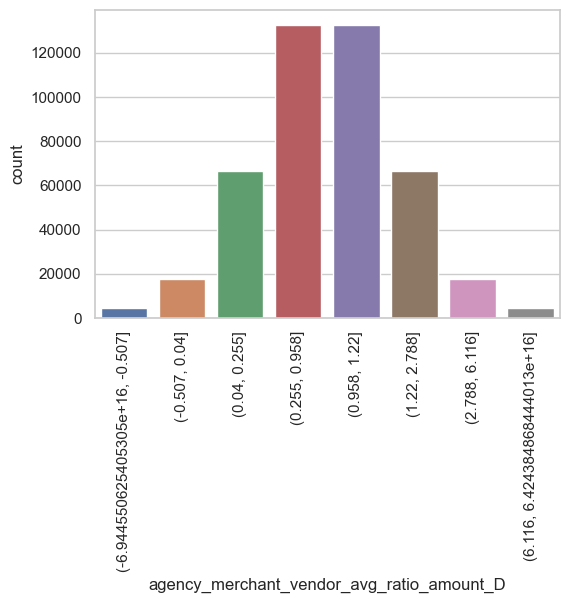

In [350]:
# cut by percentile for plotting
var = 'agency_merchant_vendor_avg_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df9[binned_var] = pd.qcut(df9[var],percentile)
#df9[['agency_merchant_vendor_avg_ratio_amount_D']]

plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_vendor_avg_ratio_amount_D", data=df9)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#df9[df9['agency_merchant_vendor_avg_ratio_amount']>2].head()

### 3.10 Feature 10: The ratio to the median amount by vendors

1. This feature can tell us the median expense on agency name, merchant category by each vedor

In [351]:
# create average spending group by agency, merchant category and vendor
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Vendor'])['Amount'].median()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['vendor_median_amount']
#stat_by_agency

In [352]:
# add the new feature average spending to the dataset 
df10 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Vendor'])
# Feature 10: ratio of amount spending and median spending by merchant category and vendor
df10['agency_merchant_vendor_median_ratio_amount'] = np.where(df10['vendor_median_amount']==0,0, df10['Amount'] / df10['vendor_median_amount'])
#df10['agency_merchant_vendor_median_ratio_amount'].describe()

[Text(0, 0, '(-683.9209999999999, -0.995]'),
 Text(1, 0, '(-0.995, 0.0912]'),
 Text(2, 0, '(0.0912, 0.507]'),
 Text(3, 0, '(0.507, 1.0]'),
 Text(4, 0, '(1.0, 1.788]'),
 Text(5, 0, '(1.788, 5.776]'),
 Text(6, 0, '(5.776, 16.505]'),
 Text(7, 0, '(16.505, 13119.0]')]

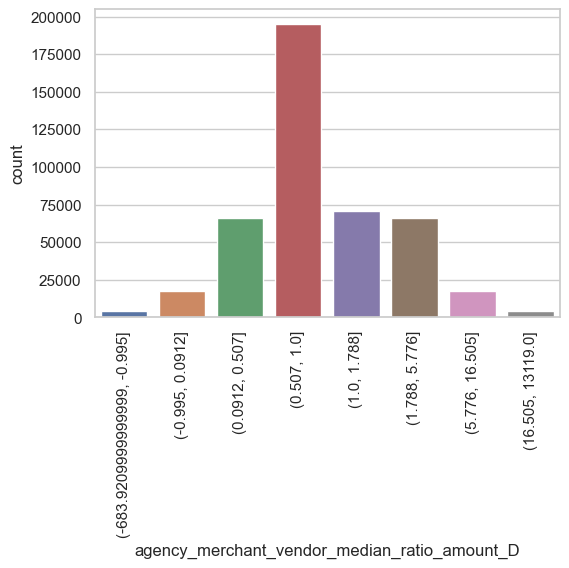

In [353]:
# cut by percentile for plotting
var = 'agency_merchant_vendor_median_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df10[binned_var] = pd.qcut(df10[var],percentile)
df10[['agency_merchant_vendor_median_ratio_amount_D']]

plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_vendor_median_ratio_amount_D", data=df10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### 3.11 Feature 11: The ratio to the total amount by vendors

1. This feature can tell us the total expense on agency name, merchant category by each vedor

In [354]:
# create total spending group by agency, merchant category and vendor
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Vendor'])['Amount'].sum()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['vendor_total_amount']
#stat_by_agency

In [355]:
# add the new feature total spending to the dataset 
df11 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Vendor'])
# Feature 10: ratio of amount spending by merchant category and vendor
df11['agency_merchant_vendor_total_ratio_amount'] = np.where(df11['vendor_total_amount']==0,0, df11['Amount'] / df11['vendor_total_amount'])
#df11['agency_merchant_vendor_total_ratio_amount'].describe()

[Text(0, 0, '(-2.3148502084684348e+16, -0.0197]'),
 Text(1, 0, '(-0.0197, 4.21e-05]'),
 Text(2, 0, '(4.21e-05, 0.000682]'),
 Text(3, 0, '(0.000682, 0.024]'),
 Text(4, 0, '(0.024, 0.674]'),
 Text(5, 0, '(0.674, 1.0]'),
 Text(6, 0, '(1.0, 2.1414616228146708e+16]')]

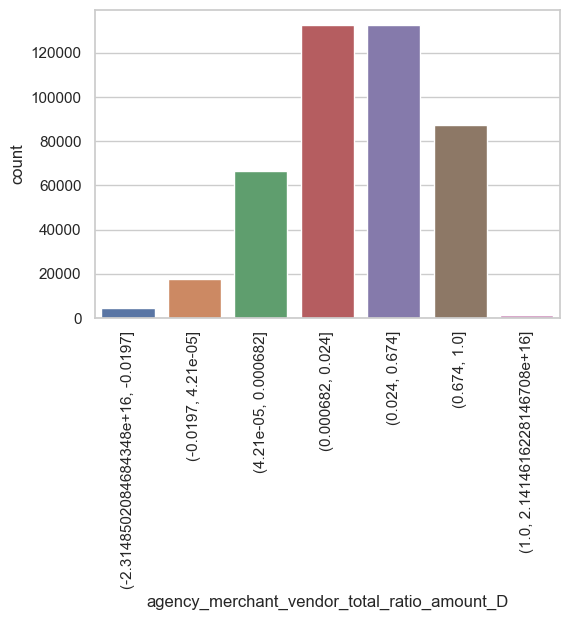

In [356]:
# cut by percentile for plotting
var = 'agency_merchant_vendor_total_ratio_amount'
binned_var = var + '_D'
percentile = [0, 0.01, 0.05, 0.2, 0.5, 0.8, 0.95, 0.99, 1]
df11[binned_var] = pd.qcut(df11[var], percentile, duplicates='drop')
df11[['agency_merchant_vendor_total_ratio_amount_D']]

plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_vendor_total_ratio_amount_D", data=df11)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#df11[df11['agency_merchant_vendor_total_ratio_amount']>2].head()

### 3.12 Feature 12: The ratio to the total counts by vendor

1. This feature can tell us the total counts on agency name, merchant category by each vedor

In [357]:
#df['Vendor'].value_counts()
# create total spending group by agency,merchant category and vendor
stat_by_agency = df.groupby(['Agency_Name', 'Merchant_Category', 'Vendor'])['Amount'].count()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['vendor_counts_amount']
#stat_by_agency

In [358]:
# add the new feature counts of spending to the dataset 
df12 = pd.merge(df, stat_by_agency, how='left', on=['Agency_Name', 'Merchant_Category', 'Vendor'])
# Feature 10: ratio of counts of spending by merchant category and vendor
df12['agency_merchant_vendor_counts_ratio_amount'] = np.where(df12['vendor_counts_amount']==0,0, df12['Amount'] / df12['vendor_counts_amount'])
#df12['agency_merchant_vendor_counts_ratio_amount'].describe()

[Text(0, 0, '(-11369.334, -18.838]'),
 Text(1, 0, '(-18.838, 0.00516]'),
 Text(2, 0, '(0.00516, 0.107]'),
 Text(3, 0, '(0.107, 4.456]'),
 Text(4, 0, '(4.456, 67.674]'),
 Text(5, 0, '(67.674, 508.0]'),
 Text(6, 0, '(508.0, 1521.767]'),
 Text(7, 0, '(1521.767, 951929.185]')]

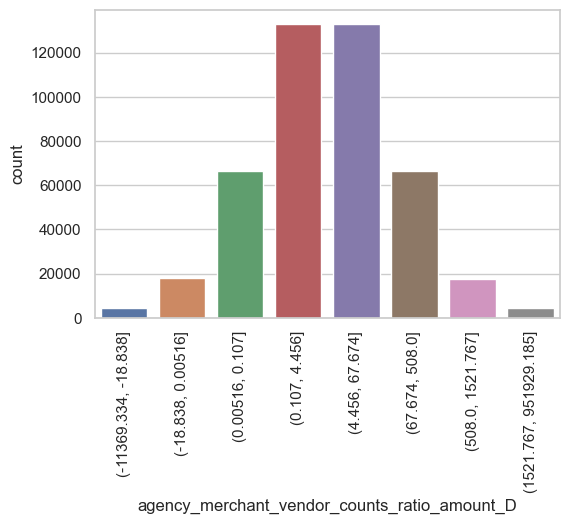

In [359]:
# cut by percentile for plotting
var = 'agency_merchant_vendor_counts_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df12[binned_var] = pd.qcut(df12[var],percentile)
#df12[['agency_merchant_vendor_counts_ratio_amount_D']]

plt.figure(figsize=(6,4))
g = sns.countplot(x="agency_merchant_vendor_counts_ratio_amount_D", data=df12)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#df12[df12['agency_merchant_vendor_counts_ratio_amount']>2].head()

### 3.13 Feature 13: Transaction frequency in daily basis

1. This feature can show us the transaction frequency in daily basis by agency and merchant category

In [360]:
# Transaction Frequency by Merchant Category
stat_by_agency = df.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Transaction_Date']).size()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['daily_transaction_frequency']
#stat_by_agency

In [361]:
# add the new feature average spending to the dataset 
df13 = pd.merge(df, stat_by_agency, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Transaction_Date'])

# Feature 13: ratio of transaction frequency by merchant category in daily basis
df13['daily_transaction_frequency_ratio'] = np.where(df13['daily_transaction_frequency'].isnull(), 0, df13['Amount'] / df13['daily_transaction_frequency'])

#df13['daily_transaction_frequency_ratio'].describe()

[Text(0, 0, '(-38506.871, -52.38]'),
 Text(1, 0, '(-52.38, 0.541]'),
 Text(2, 0, '(0.541, 7.288]'),
 Text(3, 0, '(7.288, 39.449]'),
 Text(4, 0, '(39.449, 184.78]'),
 Text(5, 0, '(184.78, 786.21]'),
 Text(6, 0, '(786.21, 2529.678]'),
 Text(7, 0, '(2529.678, 1903858.37]')]

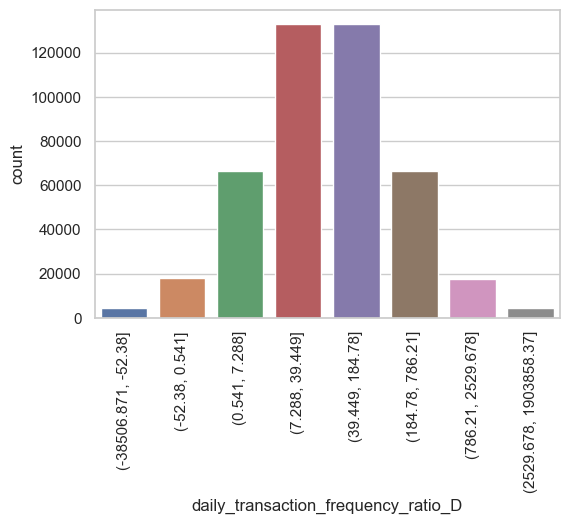

In [362]:
# cut by percentile for plotting
var = 'daily_transaction_frequency_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df13[binned_var] = pd.qcut(df13[var],percentile)
df13[['daily_transaction_frequency_ratio_D']]

plt.figure(figsize=(6,4))
g = sns.countplot(x="daily_transaction_frequency_ratio_D", data=df13)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### 3.14 Feature 14: Transaction frequency in yearly basis

1. This feature can show us the transaction frequency in yearly basis by agency and merchant category

In [363]:
# Transaction Frequency by name in yearly basis
stat_by_agency = df.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year','Month']).size()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['yearly_transaction_frequency']
#stat_by_agency

In [364]:
# add the new feature transaction frequency to the dataset 
df14 = pd.merge(df, stat_by_agency, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year'])

# Feature 14: ratio of transaction frequenct by name
df14['yearly_transaction_frequency_ratio'] = np.where(df14['yearly_transaction_frequency'].isnull(), 0, df14['Amount'] / df14['yearly_transaction_frequency'])

#df14['yearly_transaction_frequency_ratio'].describe()

[Text(0, 0, '(-21000.001, -8.397]'),
 Text(1, 0, '(-8.397, 0.0342]'),
 Text(2, 0, '(0.0342, 0.834]'),
 Text(3, 0, '(0.834, 5.534]'),
 Text(4, 0, '(5.534, 30.89]'),
 Text(5, 0, '(30.89, 156.914]'),
 Text(6, 0, '(156.914, 606.0]'),
 Text(7, 0, '(606.0, 1903858.37]')]

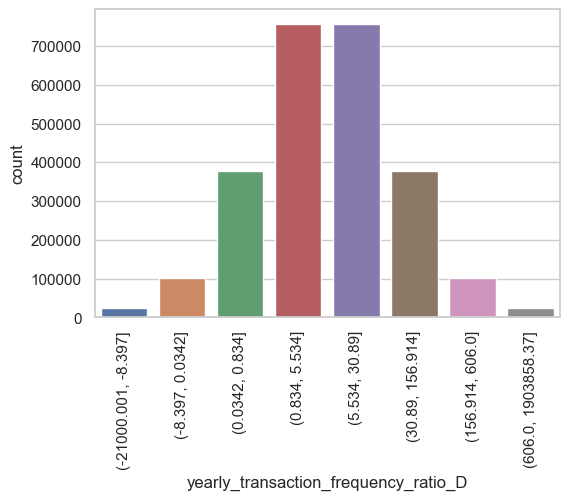

In [365]:
# cut by percentile for plotting
var = 'yearly_transaction_frequency_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df14[binned_var] = pd.qcut(df14[var],percentile)
#df14[['yearly_transaction_frequency_ratio_D']]

plt.figure(figsize=(6,4))
g = sns.countplot(x="yearly_transaction_frequency_ratio_D", data=df14)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### 3.15 Feature 15: Transaction frequency in monthly basis

1. This feature can show us the transaction frequency in monthly basis by agency and merchant category

In [366]:
# Transaction Frequency by Merchant Category
stat_by_agency = df.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year', 'Month']).size()
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['monthly_transaction_frequency']
#stat_by_agency

In [367]:
# add the new feature transaction frequency to the dataset 
df15 = pd.merge(df, stat_by_agency, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year', 'Month'])

# Feature 15: ratio of transaction frequency by year and month
df15['monthly_transaction_frequency_ratio'] = np.where(df15['monthly_transaction_frequency'].isnull(), 0, df15['Amount'] / df15['monthly_transaction_frequency'])

#df15['monthly_transaction_frequency_ratio'].describe()

[Text(0, 0, '(-8348.001, -6.909]'),
 Text(1, 0, '(-6.909, 0.0339]'),
 Text(2, 0, '(0.0339, 0.764]'),
 Text(3, 0, '(0.764, 4.805]'),
 Text(4, 0, '(4.805, 25.345]'),
 Text(5, 0, '(25.345, 123.773]'),
 Text(6, 0, '(123.773, 467.989]'),
 Text(7, 0, '(467.989, 1903858.37]')]

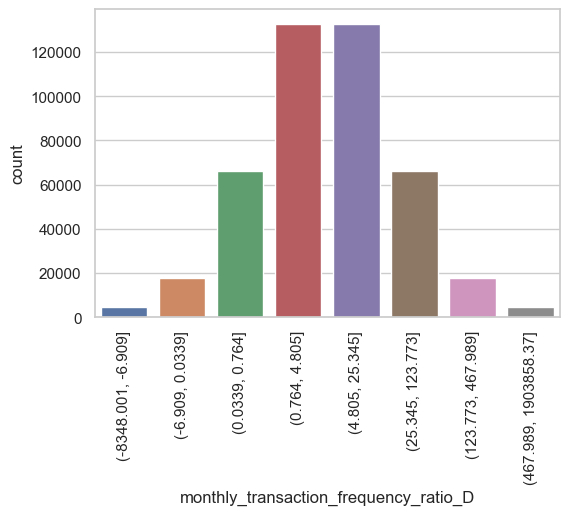

In [368]:
# cut by percentile for plotting
var = 'monthly_transaction_frequency_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df15[binned_var] = pd.qcut(df15[var],percentile)
#df15[['monthly_transaction_frequency_ratio_D']]

plt.figure(figsize=(6,4))
g = sns.countplot(x="monthly_transaction_frequency_ratio_D", data=df15)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Section 3: Combine original feature dataframes

In [369]:
combined_features = pd.concat([df1['agency_merchant_avg_ratio_amount'],df2['agency_merchant_median_ratio_amount'],df3['agency_merchant_monthly_avg_ratio_amount'],df4['agency_merchant_monthly_median_ratio_amount'], df5['agency_merchant_yearly_avg_ratio_amount'], df6['agency_merchant_yearly_median_ratio_amount'], df7['agency_merchant_dow_avg_ratio_amount'], df8['agency_merchant_dow_sum_ratio_amount'], df9['agency_merchant_vendor_avg_ratio_amount'], df10['agency_merchant_vendor_median_ratio_amount'], df11['agency_merchant_vendor_total_ratio_amount'], df12['agency_merchant_vendor_counts_ratio_amount'], df13['daily_transaction_frequency_ratio'], df14['yearly_transaction_frequency_ratio'], df15['monthly_transaction_frequency_ratio']], axis=1)
combined_features.head(3)

,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_monthly_avg_ratio_amount,agency_merchant_monthly_median_ratio_amount,agency_merchant_yearly_avg_ratio_amount,agency_merchant_yearly_median_ratio_amount,agency_merchant_dow_avg_ratio_amount,agency_merchant_dow_sum_ratio_amount,agency_merchant_vendor_avg_ratio_amount,agency_merchant_vendor_median_ratio_amount,agency_merchant_vendor_total_ratio_amount,agency_merchant_vendor_counts_ratio_amount,daily_transaction_frequency_ratio,yearly_transaction_frequency_ratio,monthly_transaction_frequency_ratio
0,2.081219,3.560000,1.840868,2.438356,2.011970,3.560000,1.978117,0.009744,1.243789,1.318519,0.138199,98.888889,222.50,14.126984,14.126984
1,0.974461,1.407761,1.015535,0.853600,1.323386,1.518354,0.950978,0.038039,0.781845,1.795426,0.026062,12.298667,92.24,21.190476,5.856508
2,0.422515,0.966824,0.422770,0.874301,0.414879,0.954222,0.489925,0.001380,1.801787,6.380146,0.150149,13.818333,165.82,13.283582,18.424444


<AxesSubplot:>

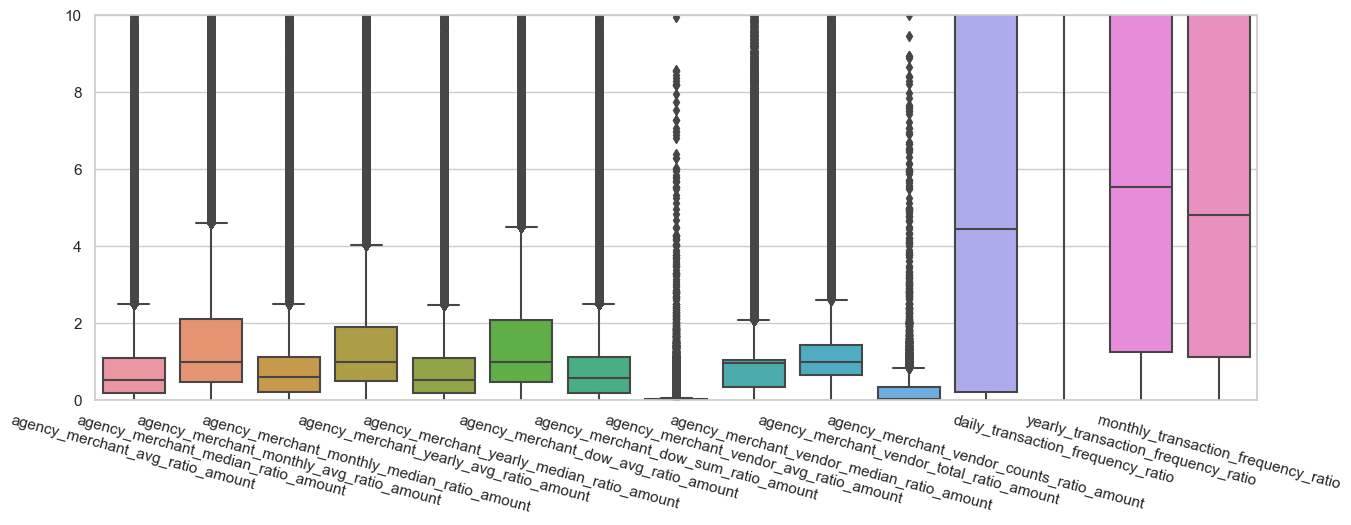

In [370]:
import matplotlib.pyplot as plt
import seaborn as sns #pip install seaborn

plt.figure(figsize=(15,5)) # Plot a graph with reasonable size.
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,10))
plt.xticks(rotation=-15)

sns.boxplot(data=combined_features)

### Thoughts: 
The overall featurs box plots seems good to use, the boxplots distribution of 6 featurs neet to be investigated
1. feature 8 is total amount spent is day-of-week, since the unit is day, so the spent amount would be small, thats the main reason that the size of this feature is smaller than the other feature, but it's fine to use for modeling since we already took the ratio amount, rather than actual amount.
2. feature 11-feature 15: These features related to time series(monthly, yearly, daily basis) and category grouping by vendors, the distribution range is larger than the other features, let's revise these feature in the following

## Section 3.1: Revise features

### Feature 11: The ratio of weekly spending and median weekly spending in current month by cardholder

In [371]:
# Assuming 'transaction_date' is in datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Extract the year and month from the transaction_date
df['year'] = df['Transaction_Date'].dt.year
df['month'] = df['Transaction_Date'].dt.month

# Calculate the week of the month
df['week_of_month'] = (df['Transaction_Date'].dt.day - 1) // 7 + 1

In [372]:
# Transaction Frequency by cardholder
stat_by_agency = df.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year', 'Month','week_of_month'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_weekly_transaction']
#stat_by_agency

In [373]:
# add the new feature transaction frequency to the dataset 
df11 = pd.merge(df, stat_by_agency, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year', 'Month','week_of_month'])

# Feature 11: ratio of transaction frequency by year and month
df11['median_weekly_transaction_ratio'] = np.where(df11['median_weekly_transaction']==0, 0, df11['Amount'] / df11['median_weekly_transaction'])

#df11['median_weekly_transaction_ratio'].describe()

[Text(0, 0, '(-99085.001, -1.421]'),
 Text(1, 0, '(-1.421, 0.0579]'),
 Text(2, 0, '(0.0579, 0.389]'),
 Text(3, 0, '(0.389, 1.0]'),
 Text(4, 0, '(1.0, 1.975]'),
 Text(5, 0, '(1.975, 8.857]'),
 Text(6, 0, '(8.857, 29.691]'),
 Text(7, 0, '(29.691, 109655.0]')]

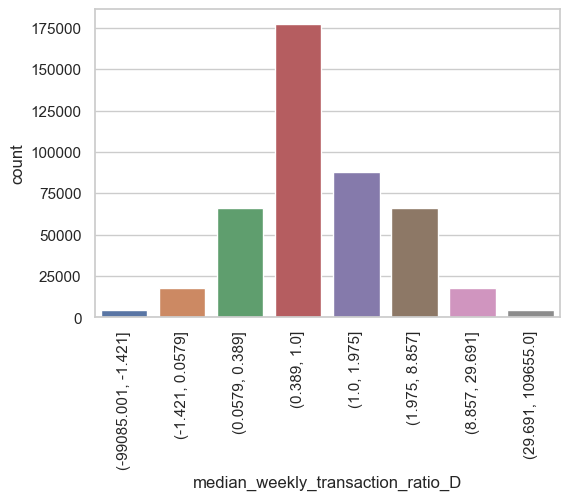

In [374]:
# cut by percentile for plotting
var = 'median_weekly_transaction_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df11[binned_var] = pd.qcut(df11[var],percentile)
#df12[['median_weekly_transaction_ratio_D']]
#sns.countplot(x="median_weekly_transaction_ratio_D", data=df11)
plt.figure(figsize=(6,4))
g = sns.countplot(x="median_weekly_transaction_ratio_D", data=df11)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#df12[df12['median_weekly_transaction_ratio']>2].head()

### Feature 12: The ratio of weekly spending and mean weekly spending in current month by cardholder

In [375]:
# Transaction Frequency by cardholder
stat_by_agency = df.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year', 'Month','week_of_month'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['mean_weekly_transaction']
#stat_by_agency

In [376]:
# add the new feature transaction frequency to the dataset 
df12 = pd.merge(df, stat_by_agency, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year', 'Month','week_of_month'])

# Feature 12: ratio of transaction frequency by year and month
df12['mean_weekly_transaction_ratio'] = np.where(df12['mean_weekly_transaction']==0, 0, df12['Amount'] / df12['mean_weekly_transaction'])

#df12['mean_weekly_transaction_ratio'].describe()

[Text(0, 0, '(-7.756373410408699e+16, -1.162]'),
 Text(1, 0, '(-1.162, 0.0261]'),
 Text(2, 0, '(0.0261, 0.165]'),
 Text(3, 0, '(0.165, 0.827]'),
 Text(4, 0, '(0.827, 1.571]'),
 Text(5, 0, '(1.571, 3.095]'),
 Text(6, 0, '(3.095, 5.871]'),
 Text(7, 0, '(5.871, 7.756373410408699e+16]')]

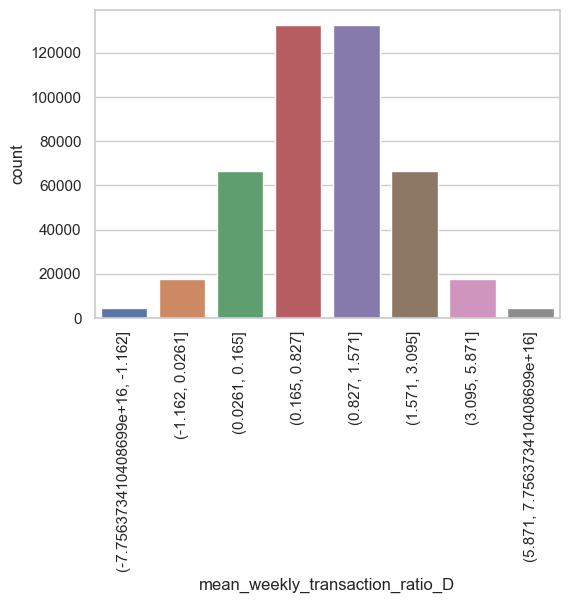

In [377]:
# cut by percentile for plotting
var = 'mean_weekly_transaction_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df12[binned_var] = pd.qcut(df12[var],percentile)
#df12[['mean_weekly_transaction_ratio_D']]
#sns.countplot(x="mean_weekly_transaction_ratio_D", data=df12)
plt.figure(figsize=(6,4))
g = sns.countplot(x="mean_weekly_transaction_ratio_D", data=df12)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#df12[df12['mean_weekly_transaction_ratio']>2].head()

### Feature 13: The ratio of monthly spending to median monthly spending by same cardholder

In [378]:
# Transaction Frequency by cardholder
stat_by_agency = df.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year', 'Month'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_monthly_transaction']
#stat_by_agency

In [379]:
# add the new feature transaction frequency to the dataset 
df13 = pd.merge(df, stat_by_agency, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year', 'Month'])

# Feature 13: ratio of transaction frequency by year and month
df13['median_monthly_transaction_ratio'] = np.where(df13['median_monthly_transaction']==0, 0, df13['Amount'] / df13['median_monthly_transaction'])

#df13['mean_weekly_transaction_ratio'].describe()

[Text(0, 0, '(-49090.001, -1.454]'),
 Text(1, 0, '(-1.454, 0.0521]'),
 Text(2, 0, '(0.0521, 0.308]'),
 Text(3, 0, '(0.308, 1.0]'),
 Text(4, 0, '(1.0, 2.839]'),
 Text(5, 0, '(2.839, 10.704]'),
 Text(6, 0, '(10.704, 30.796]'),
 Text(7, 0, '(30.796, 6000.0]')]

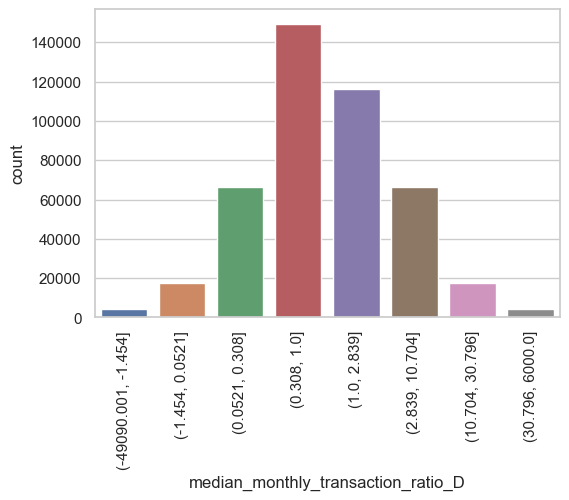

In [380]:
# cut by percentile for plotting
var = 'median_monthly_transaction_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df13[binned_var] = pd.qcut(df13[var],percentile)
#df13[['median_monthly_transaction_ratio_D']]
#sns.countplot(x="median_monthly_transaction_ratio_D", data=df13)
plt.figure(figsize=(6,4))
g = sns.countplot(x="median_monthly_transaction_ratio_D", data=df13)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
#df13[df13['median_monthly_transaction_ratio']>2].head()

### Feature 14: The ratio of monthly spending to average monthly spending by same cardholder

In [381]:
# Transaction Frequency by cardholder
stat_by_agency = df.groupby(['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year', 'Month'])['Amount'].mean() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['avg_monthly_transaction']
#stat_by_agency

In [382]:
# add the new feature transaction frequency to the dataset 
df14 = pd.merge(df, stat_by_agency, how='left', on=['Cardholder_Last_Name', 'Cardholder_First_Initial', 'Year', 'Month'])

# Feature 14: ratio of transaction frequency by year and month
df14['avg_monthly_transaction_ratio'] = np.where(df14['avg_monthly_transaction']==0, 0, df14['Amount'] / df14['avg_monthly_transaction'])

#df14['avg_monthly_transaction_ratio'].describe()

[Text(0, 0, '(-7.151575470775992e+16, -0.909]'),
 Text(1, 0, '(-0.909, 0.0193]'),
 Text(2, 0, '(0.0193, 0.116]'),
 Text(3, 0, '(0.116, 0.543]'),
 Text(4, 0, '(0.543, 1.582]'),
 Text(5, 0, '(1.582, 3.615]'),
 Text(6, 0, '(3.615, 7.209]'),
 Text(7, 0, '(7.209, 6.403555720167424e+16]')]

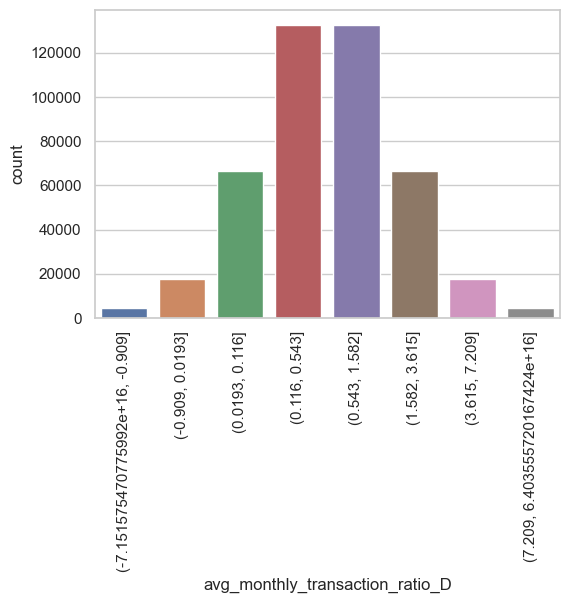

In [383]:
# cut by percentile for plotting
var = 'avg_monthly_transaction_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df14[binned_var] = pd.qcut(df14[var],percentile)
#df14[['avg_monthly_transaction_D']]

plt.figure(figsize=(6,4))
g = sns.countplot(x="avg_monthly_transaction_ratio_D", data=df14)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Feature 15: The ratio of transaction amount to median amount by vendor

In [384]:
# Transaction Frequency by cardholder
stat_by_agency = df.groupby(['Vendor'])['Amount'].median() 
stat_by_agency = pd.DataFrame(stat_by_agency)
stat_by_agency.columns = ['median_vendor_amount']
stat_by_agency

,median_vendor_amount
Vendor,
#1 PARTY SUPPLIES,347.060
#101 BLUE CORN,379.210
#15 VS,58.435
#17 VS,128.900
#18 VS,191.840
...,...
www.molport.com,205.000
www.sublimevideo.net,19.900
www.testking.com,99.990


In [385]:
# add the new feature transaction frequency to the dataset 
df15 = pd.merge(df, stat_by_agency, how='left', on=['Vendor'])

# Feature 15: ratio of transaction frequency by vendor
df15['median_vendor_amount_ratio'] = np.where(df15['median_vendor_amount']==0, 0, df15['Amount'] / df15['median_vendor_amount'])

df15['median_vendor_amount_ratio'].describe()

count    442458.000000
mean          2.043733
std          21.331788
min        -663.000000
25%           0.592562
50%           1.000000
75%           1.638378
max       13119.000000
Name: median_vendor_amount_ratio, dtype: float64

[Text(0, 0, '(-663.001, -0.951]'),
 Text(1, 0, '(-0.951, 0.0843]'),
 Text(2, 0, '(0.0843, 0.461]'),
 Text(3, 0, '(0.461, 1.0]'),
 Text(4, 0, '(1.0, 2.018]'),
 Text(5, 0, '(2.018, 6.66]'),
 Text(6, 0, '(6.66, 19.529]'),
 Text(7, 0, '(19.529, 13119.0]')]

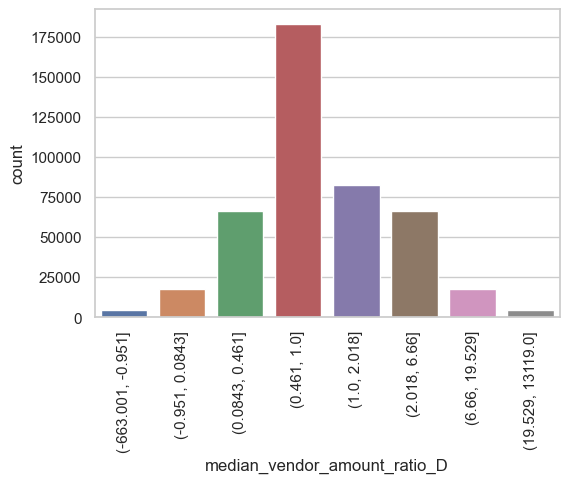

In [386]:
# cut by percentile for plotting
var = 'median_vendor_amount_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df15[binned_var] = pd.qcut(df15[var],percentile)
#df15[['median_vendor_amount_ratio_D']]

plt.figure(figsize=(6,4))
g = sns.countplot(x="median_vendor_amount_ratio_D", data=df15)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Section 4: Combine new features to dataframe

In [387]:
combined_features = pd.concat([df1['agency_merchant_avg_ratio_amount'],df2['agency_merchant_median_ratio_amount'],df3['agency_merchant_monthly_avg_ratio_amount'],df4['agency_merchant_monthly_median_ratio_amount'], df5['agency_merchant_yearly_avg_ratio_amount'], df6['agency_merchant_yearly_median_ratio_amount'], df7['agency_merchant_dow_avg_ratio_amount'], df8['agency_merchant_dow_sum_ratio_amount'], df9['agency_merchant_vendor_avg_ratio_amount'], df10['agency_merchant_vendor_median_ratio_amount'], df11['median_weekly_transaction_ratio'], df12['mean_weekly_transaction_ratio'], df13['median_monthly_transaction_ratio'], df14['avg_monthly_transaction_ratio'], df15['median_vendor_amount_ratio']], axis=1)
combined_features.head(3)

,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_monthly_avg_ratio_amount,agency_merchant_monthly_median_ratio_amount,agency_merchant_yearly_avg_ratio_amount,agency_merchant_yearly_median_ratio_amount,agency_merchant_dow_avg_ratio_amount,agency_merchant_dow_sum_ratio_amount,agency_merchant_vendor_avg_ratio_amount,agency_merchant_vendor_median_ratio_amount,median_weekly_transaction_ratio,mean_weekly_transaction_ratio,median_monthly_transaction_ratio,avg_monthly_transaction_ratio,median_vendor_amount_ratio
0,2.081219,3.560000,1.840868,2.438356,2.011970,3.560000,1.978117,0.009744,1.243789,1.318519,2.412186,1.613511,2.461283,2.172662,1.318519
1,0.974461,1.407761,1.015535,0.853600,1.323386,1.518354,0.950978,0.038039,0.781845,1.795426,1.000000,0.668900,1.020354,0.900703,2.120460
2,0.422515,0.966824,0.422770,0.874301,0.414879,0.954222,0.489925,0.001380,1.801787,6.380146,1.000000,1.000000,1.000000,0.338562,-35.393810


<AxesSubplot:>

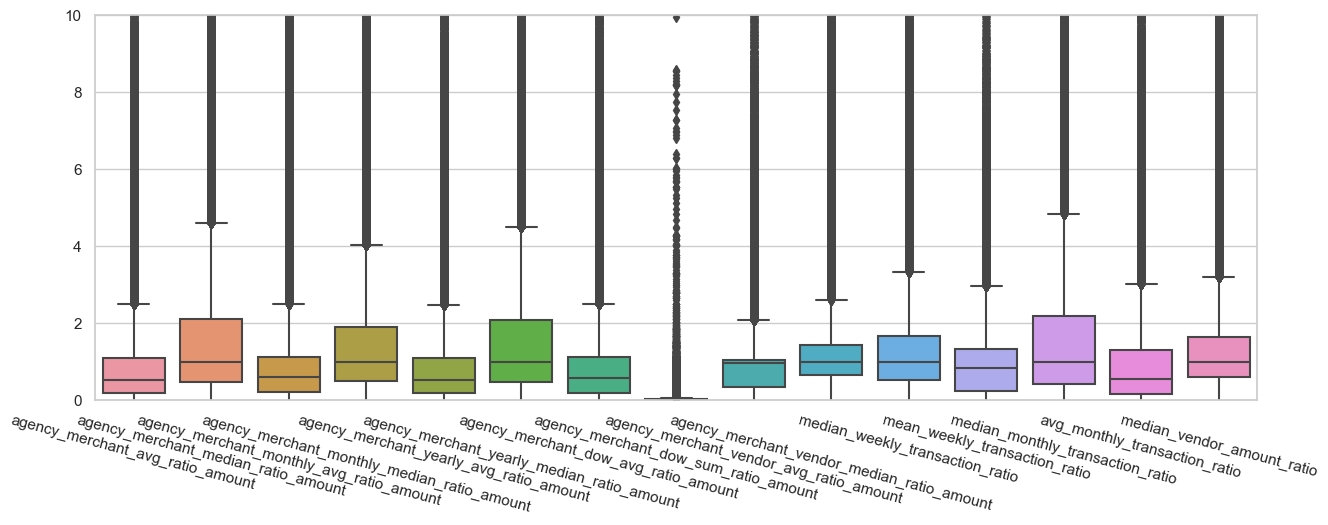

In [388]:
#import matplotlib.pyplot as plt
#import seaborn as sns #pip install seaborn

plt.figure(figsize=(15,5)) # Plot a graph with reasonable size.
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,10))
plt.xticks(rotation=-15)

sns.boxplot(data=combined_features)

### Summary:
After revision, all features seems quite good, the distribution is in normal ranger,and ready for modeling

# Section 5: Modeling

## Section 5.1: HBOS

In [496]:
#split dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test = train_test_split(combined_features, test_size=0.3)

In [497]:
from pyod.models.hbos import HBOS
n_bins = 50
hbos = HBOS(n_bins=n_bins,contamination=0.05)
hbos.fit(X_train)

# Training data
y_train_scores = hbos.decision_function(X_train)
y_train_pred = hbos.predict(X_train)

# Test data
y_test_scores = hbos.decision_function(X_test)
y_test_pred = hbos.predict(X_test) # outlier labels (0 or 1)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , hbos.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))

The threshold for the defined contamination rate: 49.00300880818248
The training data: {0: 299705, 1: 10015}
The training data: {0: 128458, 1: 4280}


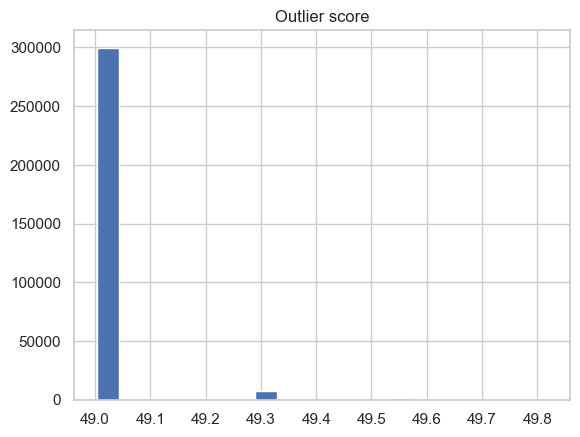

In [498]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

In [499]:
threshold = hbos.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_monthly_avg_ratio_amount,agency_merchant_monthly_median_ratio_amount,agency_merchant_yearly_avg_ratio_amount,agency_merchant_yearly_median_ratio_amount,agency_merchant_dow_avg_ratio_amount,agency_merchant_dow_sum_ratio_amount,agency_merchant_vendor_avg_ratio_amount,agency_merchant_vendor_median_ratio_amount,median_weekly_transaction_ratio,mean_weekly_transaction_ratio,median_monthly_transaction_ratio,avg_monthly_transaction_ratio,median_vendor_amount_ratio,Anomaly_Score
0,Normal,292031,94.288712,0.85,2.06,8.381666e+10,1.98,-5.935986e+11,2.03,2.316332e+11,-2.081923e+09,1.732460e+11,1.35,2.21,2.682562e+11,2.45,9.700000e-01,1.4,49.00
1,Outlier,17689,5.711288,3.15,40.13,2.740000e+00,43.84,3.040000e+00,31.55,3.860865e+13,8.726377e+11,-3.789498e+12,9.09,12.02,9.908891e+11,4.57,4.115261e+12,12.3,49.21


In [500]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_monthly_avg_ratio_amount,agency_merchant_monthly_median_ratio_amount,agency_merchant_yearly_avg_ratio_amount,agency_merchant_yearly_median_ratio_amount,agency_merchant_dow_avg_ratio_amount,agency_merchant_dow_sum_ratio_amount,agency_merchant_vendor_avg_ratio_amount,agency_merchant_vendor_median_ratio_amount,median_weekly_transaction_ratio,mean_weekly_transaction_ratio,median_monthly_transaction_ratio,avg_monthly_transaction_ratio,median_vendor_amount_ratio,Anomaly_Score
0,Normal,125236,94.348265,0.85,2.05,-1.954475e+11,1.98,1.384180e+12,2.04,8.700000e-01,6.000000e-02,4.153484e+10,1.35,2.20,1.030000e+00,2.47,9.200000e-01,1.40,49.00
1,Outlier,7502,5.651735,4.07,83.09,2.820000e+00,82.11,3.960000e+00,84.93,-1.000523e+14,-1.976553e+12,1.497945e+12,11.04,-7.12,-1.277886e+13,6.79,-9.703394e+12,13.48,49.21


### Achieve Model Stability by Aggregating Multiple Models

In [487]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(combined_features, test_size=0.3)

from pyod.models.combination import aom, moa, average, maximization
from pyod.utils.utility import standardizer
from pyod.models.hbos import HBOS

# Standardize data
X_train_norm, X_test_norm = standardizer(X_train, X_test)

# Test a range of binning 
k_list = [5, 10, 15, 20, 25, 30, 50, 60, 75, 100]
n_clf = len(k_list)
# Just prepare data frames so we can store the model results
train_scores = np.zeros([X_train.shape[0], n_clf])
test_scores = np.zeros([X_test.shape[0], n_clf])

# Modeling
for i in range(n_clf):
    k = k_list[i]
    hbos = HBOS(n_bins=n_bins)
    hbos.fit(X_train_norm)
    # Store the results in each column:
    train_scores[:, i] = hbos.decision_function(X_train_norm) 
    test_scores[:, i] = hbos.decision_function(X_test_norm) 
# Decision scores have to be normalized before combination
train_scores_norm, test_scores_norm = standardizer(train_scores,test_scores)

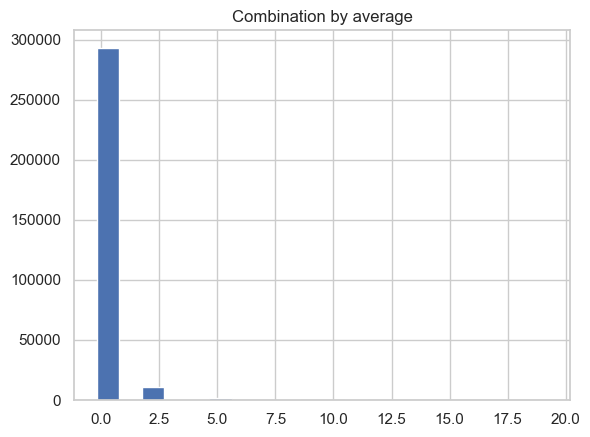

In [488]:
# Combination by average
# The test_scores_norm is 500 x 10. The "average" function will take the average of the 10 columns. The result "y_by_average" is a single column: 
y_train_by_average = average(train_scores_norm)
y_test_by_average = average(test_scores_norm)
import matplotlib.pyplot as plt
plt.hist(y_train_by_average, bins='auto') # arguments are passed to np.histogram
plt.title("Combination by average")
plt.show()

In [489]:
descriptive_stat_threshold(X_train,y_train_by_average, 1.4)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_monthly_avg_ratio_amount,agency_merchant_monthly_median_ratio_amount,agency_merchant_yearly_avg_ratio_amount,agency_merchant_yearly_median_ratio_amount,agency_merchant_dow_avg_ratio_amount,agency_merchant_dow_sum_ratio_amount,agency_merchant_vendor_avg_ratio_amount,agency_merchant_vendor_median_ratio_amount,median_weekly_transaction_ratio,mean_weekly_transaction_ratio,median_monthly_transaction_ratio,avg_monthly_transaction_ratio,median_vendor_amount_ratio,Anomaly_Score
0,Normal,293212,94.670025,0.87,2.07,0.9,1.98,8.800000e-01,2.04,8.800000e-01,6.000000e-02,4.949850e+08,1.52,2.24,1.010000e+00,2.52,9.800000e-01,1.63,-0.19
1,Outlier,16508,5.329975,3.35,42.47,2.7,46.76,9.906528e+12,33.63,-7.180374e+13,-1.245051e+12,-2.912845e+12,6.96,12.63,5.036534e+12,4.45,3.375525e+12,9.11,3.39


In [490]:
descriptive_stat_threshold(X_test,y_test_by_average, 1.4)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_monthly_avg_ratio_amount,agency_merchant_monthly_median_ratio_amount,agency_merchant_yearly_avg_ratio_amount,agency_merchant_yearly_median_ratio_amount,agency_merchant_dow_avg_ratio_amount,agency_merchant_dow_sum_ratio_amount,agency_merchant_vendor_avg_ratio_amount,agency_merchant_vendor_median_ratio_amount,median_weekly_transaction_ratio,mean_weekly_transaction_ratio,median_monthly_transaction_ratio,avg_monthly_transaction_ratio,median_vendor_amount_ratio,Anomaly_Score
0,Normal,125788,94.764122,0.87,2.08,0.91,1.99,8.800000e-01,2.07,8.900000e-01,6.000000e-02,9.500000e-01,1.52,2.30,1.020000e+00,2.56,9.900000e-01,1.63,-0.19
1,Outlier,6950,5.235878,3.18,89.52,2.61,88.18,-2.353050e+13,90.84,1.705520e+14,2.957310e+12,6.897858e+12,8.27,-10.61,-1.196304e+13,3.25,-8.017721e+12,10.27,3.38


## Summary:
1. The model performs good in our features, there is 5.71% outliers in train group, and 5.65% outliers in the test group; the performace is close to our contamination rate(5.0%), and our model did not overfit.
2. We achieved model stability by using combination by average in aggregating mutiple models, reduce the chance of overfitting and increase prediction accuracy in both train and test dataset: 5.32% outliers in train group(successfully decrease 0.39% mis-outlier rate, false positive), 5.42% outliers in test group(successfully decrease 0.23% mis-outlier rate, false positive).

## Section 5.2: ECOD

In [398]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(combined_features, test_size=0.3)

In [399]:
from pyod.models.ecod import ECOD
ecod = ECOD() #contamination=0.05)
ecod.fit(X_train)

# Training data
y_train_scores = ecod.decision_function(X_train)
y_train_pred = ecod.predict(X_train)

# Test data
y_test_scores = ecod.decision_function(X_test)
y_test_pred = ecod.predict(X_test) # outlier labels (0 or 1)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic. 
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))
# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:" , ecod.threshold_)

The training data: {0: 278748, 1: 30972}
The training data: {0: 119458, 1: 13280}
The threshold for the defined comtanimation rate: 39.754713646497926


In [400]:
np.where(y_train_scores>22)

(array([     1,      2,      4, ..., 309716, 309718, 309719]),)

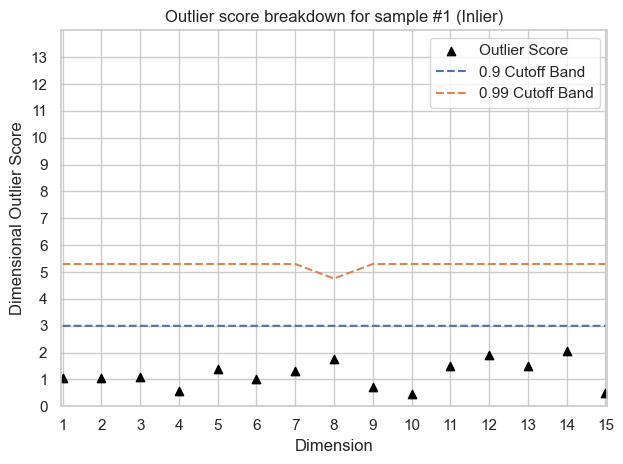

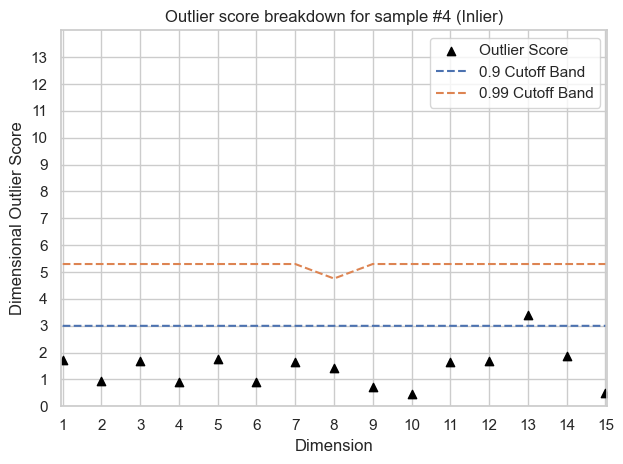

In [401]:
ecod.explain_outlier(1)
ecod.explain_outlier(2)

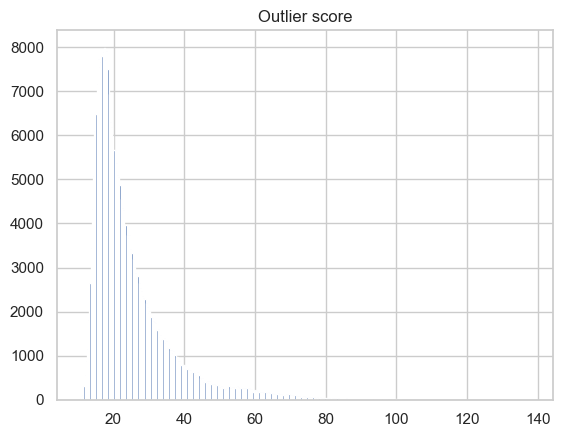

In [402]:
# determine thereshold
#import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

In [403]:
threshold = ecod.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_monthly_avg_ratio_amount,agency_merchant_monthly_median_ratio_amount,agency_merchant_yearly_avg_ratio_amount,agency_merchant_yearly_median_ratio_amount,agency_merchant_dow_avg_ratio_amount,agency_merchant_dow_sum_ratio_amount,agency_merchant_vendor_avg_ratio_amount,agency_merchant_vendor_median_ratio_amount,median_weekly_transaction_ratio,mean_weekly_transaction_ratio,median_monthly_transaction_ratio,avg_monthly_transaction_ratio,median_vendor_amount_ratio,Anomaly_Score
0,Normal,278748,90.0,0.76,1.70,0.81,1.52,6.218849e+11,1.69,7.900000e-01,6.000000e-02,1.809809e+11,1.38,1.88,9.400000e-01,2.07,8.900000e-01,1.48,21.85
1,Outlier,30972,10.0,3.26,44.03,2.79,46.96,3.220000e+00,39.64,4.228668e+13,9.424304e+11,6.133750e+11,5.92,3.69,1.281297e+12,7.52,2.067531e+12,7.16,53.48


In [404]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

,Group,Count,Count %,agency_merchant_avg_ratio_amount,agency_merchant_median_ratio_amount,agency_merchant_monthly_avg_ratio_amount,agency_merchant_monthly_median_ratio_amount,agency_merchant_yearly_avg_ratio_amount,agency_merchant_yearly_median_ratio_amount,agency_merchant_dow_avg_ratio_amount,agency_merchant_dow_sum_ratio_amount,agency_merchant_vendor_avg_ratio_amount,agency_merchant_vendor_median_ratio_amount,median_weekly_transaction_ratio,mean_weekly_transaction_ratio,median_monthly_transaction_ratio,avg_monthly_transaction_ratio,median_vendor_amount_ratio,Anomaly_Score
0,Normal,119458,89.995329,0.76,1.71,0.81,1.64,2.902262e+12,1.67,7.900000e-01,6.000000e-02,8.900000e-01,1.39,1.87,6.557881e+11,1.92,8.500000e-01,1.48,21.86
1,Outlier,13280,10.004671,2.86,11.23,2.50,10.87,-3.916021e+13,11.15,-9.862222e+13,-2.197963e+12,-5.229330e+12,5.55,16.47,-8.887310e+12,8.93,-4.821955e+12,7.00,53.48


## Summary:
1. The model performs quite good in our features, there is 10.0% outliers in train group, and 10.0% outliers in the test group; the performace is quite close to our contamination rate(5.0%), however the model performance could also be improved

## Section 5.3: Compare models: HBOS and ECOD

In [405]:
# Split the data into training and testing sets
X_train, X_test = train_test_split(combined_features, test_size=0.3)
########
# HBOS #
########
from pyod.models.hbos import HBOS
n_bins = 50
hbos = HBOS(n_bins=n_bins, contamination=0.05)
hbos.fit(X_train)
y_train_hbos_pred = hbos.labels_
y_test_hbos_pred = hbos.predict(X_test)
y_train_hbos_scores = hbos.decision_function(X_train)
y_test_hbos_scores = hbos.decision_function(X_test)

########
# ECOD #
########
from pyod.models.ecod import ECOD
clf_name = 'ECOD'
ecod = ECOD(contamination=0.05)
ecod.fit(X_train)
y_train_ecod_pred = ecod.labels_
y_test_ecod_pred = ecod.predict(X_test)
y_train_ecod_scores = ecod.decision_scores_  # raw outlier scores
y_test_ecod_scores = ecod.decision_function(X_test)

# Thresholds
[ecod.threshold_, hbos.threshold_]


[49.96715824384709, 49.34962543500772]

In [406]:
pred_combine=pd.DataFrame({'HBOS_pred': y_test_hbos_pred, 'ECOD_pred': y_test_ecod_pred})
pd.crosstab(pred_combine['HBOS_pred'],pred_combine['ECOD_pred'])

ECOD_pred,0,1
HBOS_pred,,
0,123609,4983
1,2344,1802


### Summary:
1. From the models comparison, HBOS perfomed better in our unsupervised modeling, there are 123609 variabls are both detected normal, and 1802 variabls are both detected outliers, the sum of other outliers is 5.5% of whole dataset.